<a href="https://www.kaggle.com/code/mahendrasinghrajpoot/modelling-experimentation-in-spaceship-titanic?scriptVersionId=107264295" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Starting with a Blind EDA

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
train = pd.read_csv("../input/spaceship-titanic/train.csv")
test = pd.read_csv("../input/spaceship-titanic/test.csv")

In [3]:
train.shape

(8693, 14)

In [4]:
test.shape

(4277, 13)

In [5]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [7]:
train.groupby('HomePlanet')['RoomService'].describe()

,count,mean,std,min,25%,50%,75%,max
HomePlanet,,,,,,,,
Earth,4499.0,136.940209,381.408218,0.0,0.0,0.0,31.5,6256.0
Europa,2095.0,145.231981,791.140422,0.0,0.0,0.0,0.0,14327.0
Mars,1723.0,552.897272,947.611891,0.0,0.0,25.0,850.0,9920.0


In [8]:
train.groupby('HomePlanet')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
HomePlanet,,,,,,,,
Earth,4514.0,26.068232,14.317496,0.0,18.0,23.0,35.0,79.0
Europa,2085.0,34.419664,13.089347,0.0,26.0,33.0,43.0,79.0
Mars,1716.0,29.297203,14.558386,0.0,20.0,28.0,38.0,76.0


In [9]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [10]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

<AxesSubplot:>

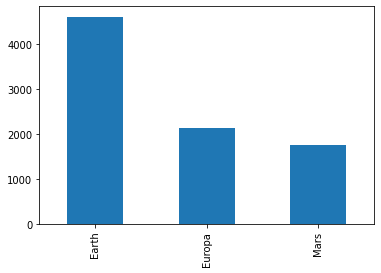

In [11]:
train['HomePlanet'].value_counts().plot.bar()

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [13]:
train.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


In [14]:
train.describe(include='object')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

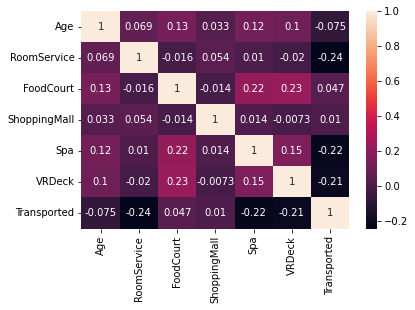

In [16]:
sns.heatmap(train.corr(),annot=True)

> There is a very big difference if you are setting the ylim as none to setting it between some values because it will be able to provide you the correct indication of limits when plotting the charts with respect to each other.

# Feature Engineering

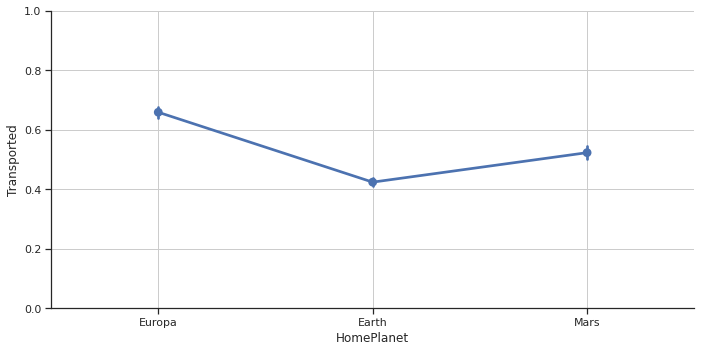

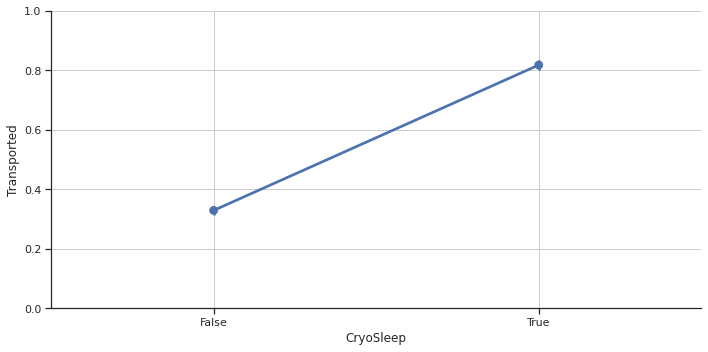

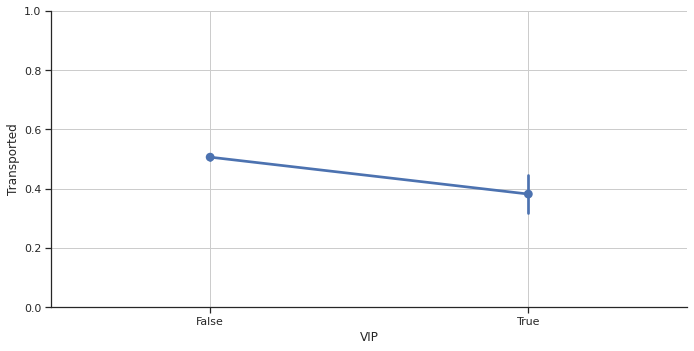

In [17]:
#plotting categorical plot for the ordinal variable
cat_col = ['HomePlanet','CryoSleep','VIP']
sns.set(style="ticks")
for i in cat_col:
    sns.catplot(x=i,y='Transported',data=train,kind="point",aspect=2)
    plt.ylim(0,1)
    plt.grid()
    plt.show()


> The ‘kernel density estimate’ plot creates a smooth version of a histogram by normalizing all points to appear under one curve.

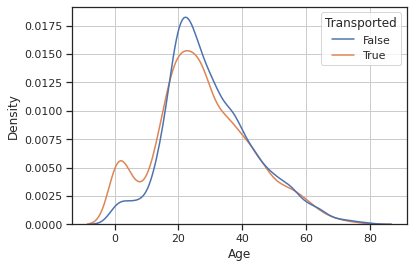

In [18]:
sns.kdeplot(x='Age',data=train,hue='Transported')
plt.grid()
plt.show()

# Tackling Missing values

In [19]:
features_na = [features for features in train.columns if train[features].isnull().sum()>1]

for features in features_na:
    print(features,np.round(train[features].isnull().sum()>1),'% missing values')

HomePlanet 1.0 % missing values
CryoSleep 1.0 % missing values
Cabin 1.0 % missing values
Destination 1.0 % missing values
Age 1.0 % missing values
VIP 1.0 % missing values
RoomService 1.0 % missing values
FoodCourt 1.0 % missing values
ShoppingMall 1.0 % missing values
Spa 1.0 % missing values
VRDeck 1.0 % missing values
Name 1.0 % missing values


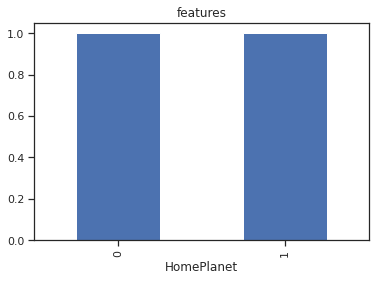

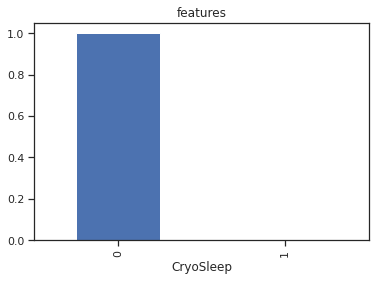

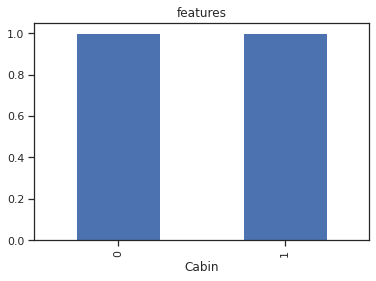

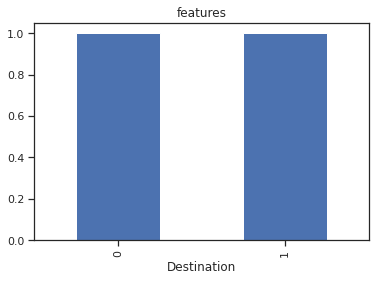

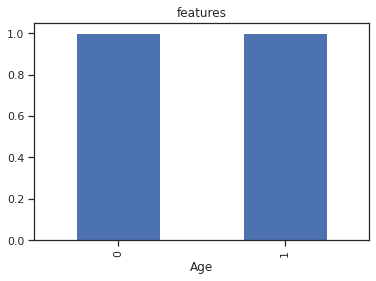

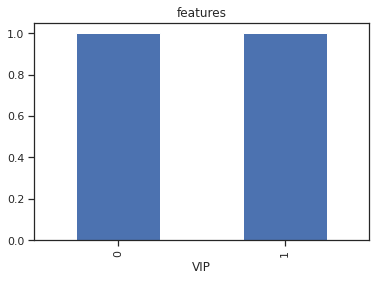

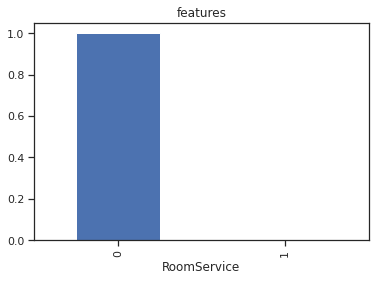

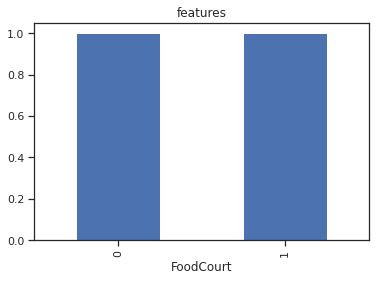

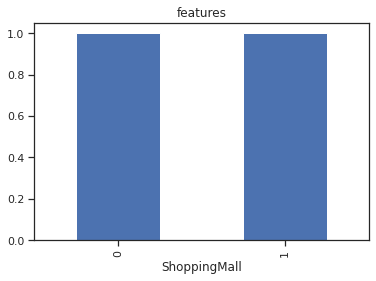

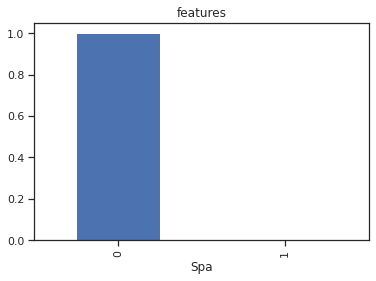

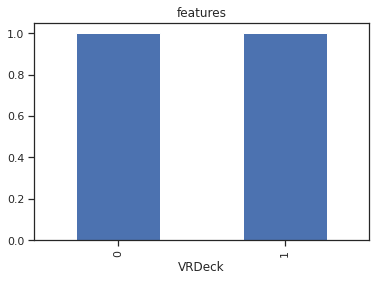

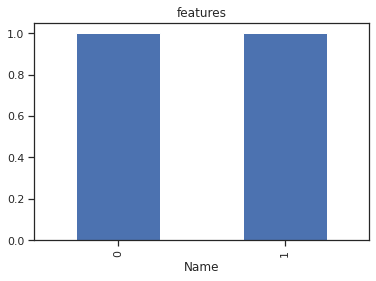

In [20]:
for features in features_na:
   
    data = train.copy()
    #conditining the missing values with replacement to the 1 and 0
    data[features] = np.where(data[features].isnull(),1,0)
    data.groupby(features)['Transported'].median().plot.bar()
    plt.title('features')
    plt.show()

> Here, the relation between the missing values and the dependent variable is clearly visible. So we need to replace these NaN values with something meaningful which we will do in Feature Engineering. From the above dataset some of the features might not be required, which we will drop.

In [21]:
'''
cols = 3
rows = 3

num_cols = train.select_dtypes(exclude='object').columns

fig = plt.figure(figsize=(15,9))

for i , col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.countplot(x=train[col],ax=ax)
fig.tight_layout()
plt.show()

''' 

"\ncols = 3\nrows = 3\n\nnum_cols = train.select_dtypes(exclude='object').columns\n\nfig = plt.figure(figsize=(15,9))\n\nfor i , col in enumerate(num_cols):\n    ax=fig.add_subplot(rows,cols,i+1)\n    sns.countplot(x=train[col],ax=ax)\nfig.tight_layout()\nplt.show()\n\n"

# Modelling the dataset

In [22]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [23]:
y_train_1 = train['Transported']

In [24]:
y_train_int = np.array(y_train_1)

> y_train in the form of Array

In [25]:
y_train_array = y_train_int.astype(int)

In [26]:
y_train_1 = pd.DataFrame(y_train_array)

> y_train in the form of list

In [27]:
y_train_list = [int(item) for item in y_train_1]

# Encoding the dataset


Before moving into the encoding part we need to understand how mnay types of encoding are present there.

There are many ways to do the character encoding, it is important to choose them based on the problem statement that is occurd with the dataset and how you want to encode your character.

We need to careful in using the techniques according to the demand of the dataset, for example, when it comes to the tasks associated with the regression , it is better to leave the Target and LeaveOneOut. 

Some of the popular are the-

a. Classicial Encoding.
1. One Hot Encoding.
2. Ordinal Encoding.
3. Binary Encoding.
4. Frequency Encoding.
5. Hashing Encoding.

b. Contrast Encoders
1. Helmet(reverse) Encoding.
2. Backward Difference Encoding.

c. Bayesian Target Encoders
1. Target Encoding.

To know about the above kinds of encoding please refer to this article- 
<a href="https://towardsdatascience.com/how-to-encode-categorical-data-d44dde313131">Amazing Articles on encoders</a>


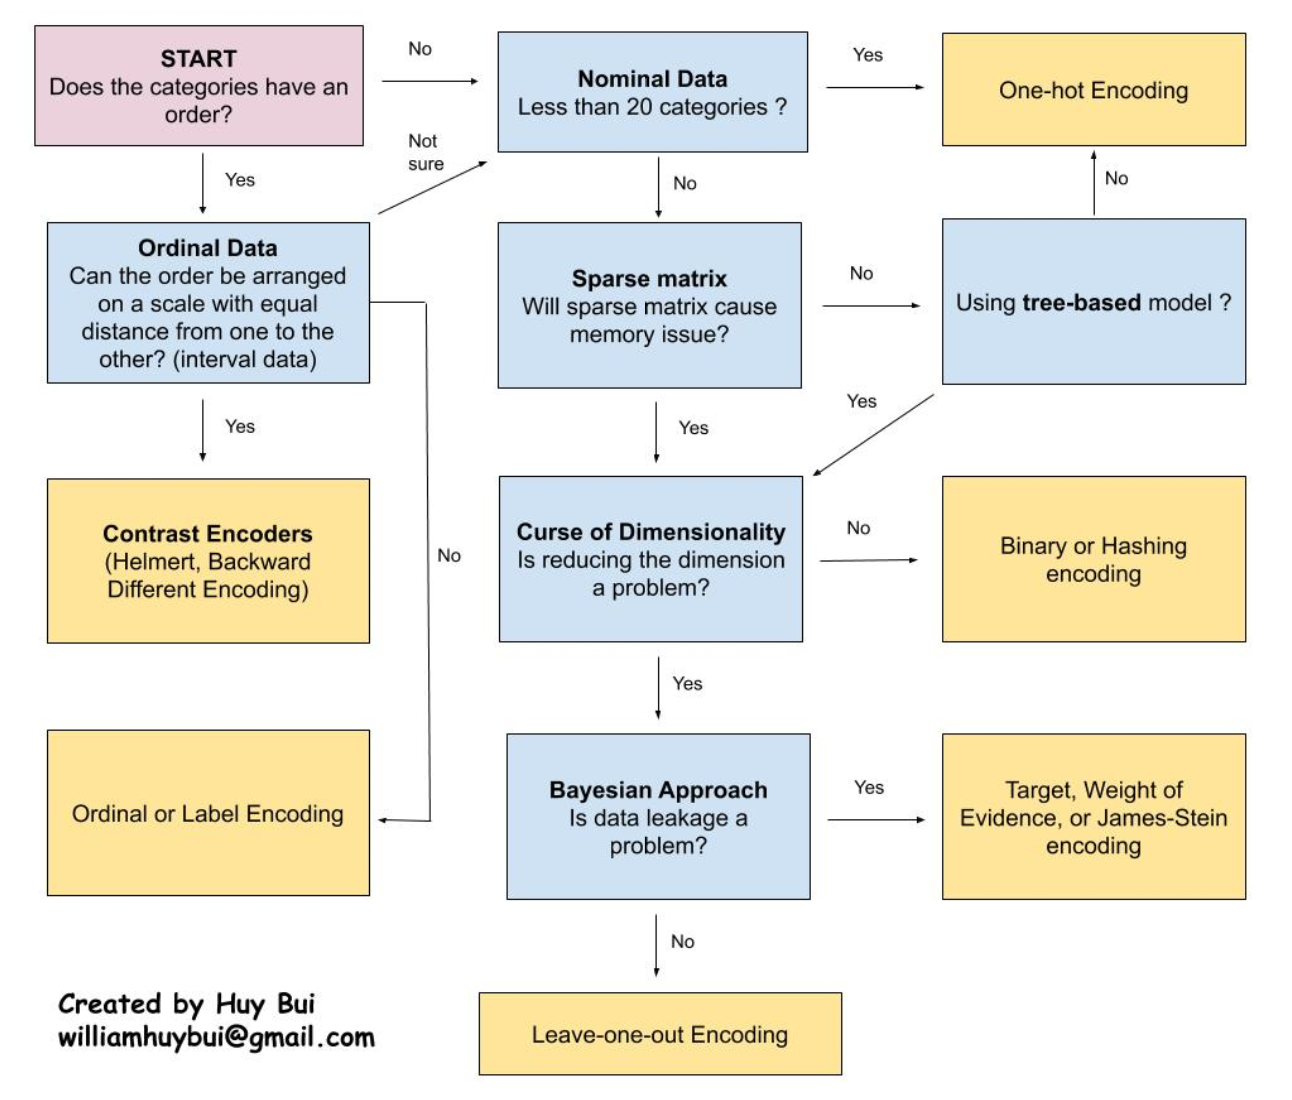

In [28]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [29]:
train = train.drop(['Transported','Name','PassengerId'],axis=1)
test = test.drop(['Name','PassengerId'],axis=1)

In [30]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0


In [31]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

In [32]:
category = ce.OrdinalEncoder(cols=['HomePlanet','CryoSleep','Cabin','Destination','VIP'],return_df=True)

In [33]:
data_2 = category.fit_transform(train)

In [34]:
test_data = category.fit_transform(test)

In [35]:
data_2.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,1,1,1,39.0,1,0.0,0.0,0.0,0.0,0.0
1,2,1,2,1,24.0,1,109.0,9.0,25.0,549.0,44.0
2,1,1,3,1,58.0,2,43.0,3576.0,0.0,6715.0,49.0
3,1,1,3,1,33.0,1,0.0,1283.0,371.0,3329.0,193.0
4,2,1,4,1,16.0,1,303.0,70.0,151.0,565.0,2.0


In [36]:
data_2.isnull().sum()

HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64

> **Visual Representation of the missing values**

# Filling out the missing values

<AxesSubplot:>

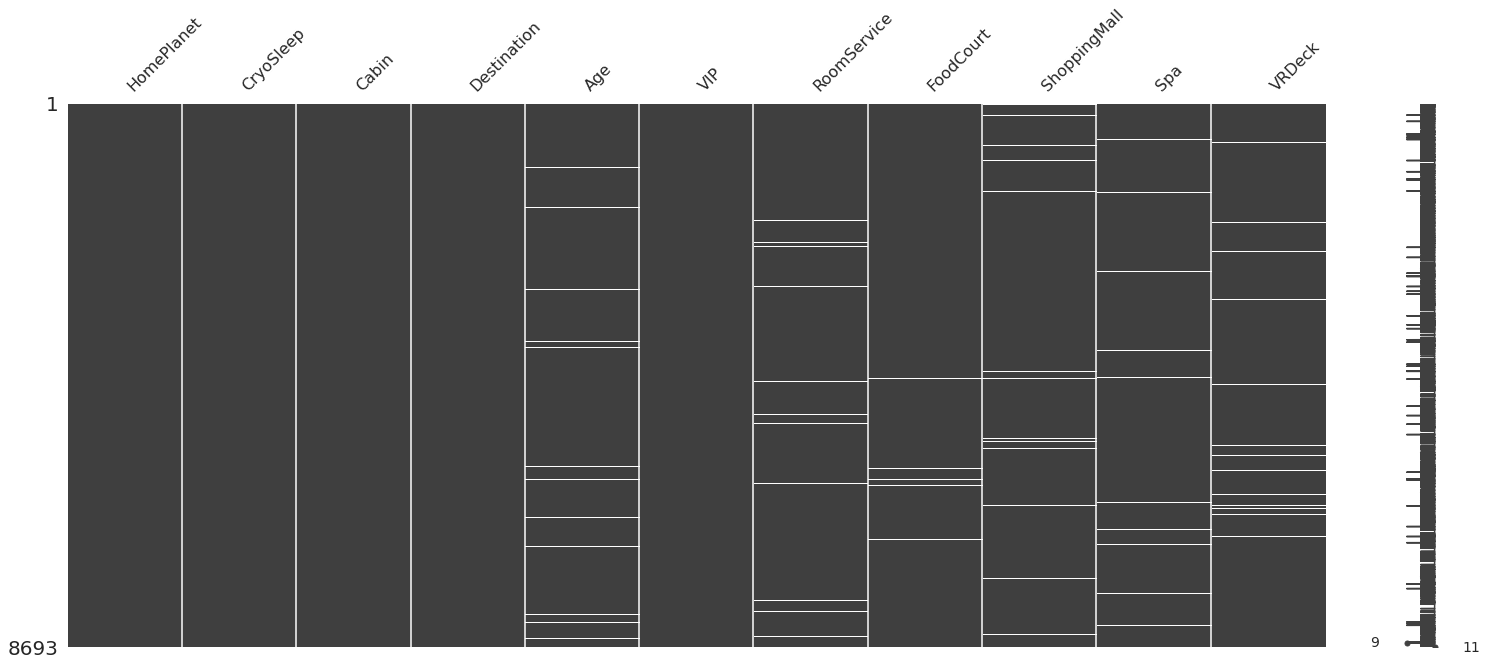

In [37]:
import missingno as msno

msno.matrix(data_2)

In [38]:
from sklearn.impute import SimpleImputer

In [39]:
imputing_values = SimpleImputer(strategy='mean')

data_simple = imputing_values.fit_transform(data_2)

In [40]:
#converting the samples of the test data into the encoding form
test = imputing_values.fit_transform(test_data)

In [41]:
pd.DataFrame(test).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [42]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)

knn_data = imputer.fit_transform(data_2)

In [43]:
knn_data =  pd.DataFrame(knn_data)

# Scaling the dataset

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [45]:
#starting of with scaling the dataset
scaler = StandardScaler()
scaled = scaler.fit_transform(knn_data)

# Modelling

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report

In [47]:
X_train_scaled = pd.DataFrame(scaled)

In [48]:
len(X_train_scaled)

8693

In [49]:
len(y_train_1)

8693

In [50]:
y_train_1.values.ravel()

array([0, 1, 0, ..., 1, 0, 1])

In [51]:
logreg = LogisticRegression()
#fitting the model to the dataset
logreg.fit(X_train_scaled,y_train_1.values.ravel())

LogisticRegression()

In [52]:
y_pred = logreg.predict(test)

In [53]:
y_train_array = y_pred.astype(bool)

In [54]:
y_train_array

array([False, False, False, ...,  True,  True,  True])

In [55]:
sample = pd.read_csv('../input/spaceship-titanic/sample_submission.csv')

In [56]:
#making the 1st submission file for the dataset
#submission_spaceship = pd.DataFrame({'PassengerId':sample['PassengerId'],'Transported':y_train_array.flatten()})

In [57]:
#submission_spaceship.to_csv('submission.csv',index=False)

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=100)

knn.fit(X_train_scaled,y_train_1.values.ravel())

KNeighborsClassifier(n_neighbors=100)

In [59]:
y_predict_knn = knn.predict(test)

In [60]:
#y_pred = y_predict_knn.astype(bool)

In [61]:
#submission_spaceship = pd.DataFrame({'PassengerId':sample['PassengerId'],'Transported':y_pred.flatten()})

In [62]:
#submission_spaceship.to_csv('submission.csv',index=False)

In [63]:
from sklearn.svm import SVC

svm = SVC(gamma='auto',kernel='linear',probability=True)
#fitting the model to the dataset
svm.fit(X_train_scaled,y_train_1.values.ravel())


SVC(gamma='auto', kernel='linear', probability=True)

In [64]:
#predicting with the svm model 
y_predict_svm = svm.predict(test)
#y_pred = y_predict_svm.astype(bool)

In [65]:
#submission_spaceship = pd.DataFrame({'PassengerId':sample['PassengerId'],'Transported':y_pred.flatten()})

In [66]:
#submission_spaceship.to_csv('submission.csv',index=False)

In [67]:
from sklearn.linear_model import SGDClassifier

stoch = SGDClassifier(loss='log',alpha=0.1,random_state=42)

In [68]:
stoch.fit(X_train_scaled,y_train_1.values.ravel())

SGDClassifier(alpha=0.1, loss='log', random_state=42)

In [69]:
#y_pred_stoch = stoch.predict(test)

In [70]:
#y_pred = y_pred_stoch.astype(bool)
#submission_spaceship = pd.DataFrame({'PassengerId':sample['PassengerId'],'Transported':y_pred.flatten()})

In [71]:
#submission_spaceship.to_csv('submission.csv',index=False)

In [72]:
from sklearn import tree

tree_space = tree.DecisionTreeClassifier()
#fitting the model to the data
tree_space.fit(X_train_scaled,y_train_1.values.ravel())

DecisionTreeClassifier()

In [73]:
#y_pred_tree = tree_space.predict(test)

In [74]:
#converting them to the boolean type as per the requirements of the submission file
#y_pred = y_pred_tree.astype(bool)
#submission_spaceship = pd.DataFrame({'PassengerId':sample['PassengerId'],'Transported':y_pred.flatten()})

In [75]:
#submission_spaceship.to_csv('submission.csv',index=False)

In [76]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(max_depth=10,random_state=69)
#fitting the model to the dataset
random.fit(X_train_scaled,y_train_1.values.ravel())

RandomForestClassifier(max_depth=10, random_state=69)

In [77]:
#y_pred_random = random.predict(test)

#y_pred = y_pred_random.astype(bool)

In [78]:
#submission_spaceship = pd.DataFrame({'PassengerId':sample['PassengerId'],'Transported':y_pred.flatten()})

In [79]:
#submission_spaceship.to_csv('submission.csv',index=False)

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
gradient = GradientBoostingClassifier(n_estimators=100,
                                     learning_rate=1.0,
                                     max_depth=6,
                                     random_state=69)

In [81]:
gradient.fit(X_train_scaled,y_train_1.values.ravel())

GradientBoostingClassifier(learning_rate=1.0, max_depth=6, random_state=69)

In [82]:
#y_pred_grad = gradient.predict(test)

In [83]:
#y_pred = y_pred_grad.astype(bool)

In [84]:
#submission_spaceship = pd.DataFrame({'PassengerId':sample['PassengerId'],'Transported':y_pred.flatten()})

In [85]:
#submission_spaceship.to_csv('submission.csv',index=False)

In [86]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()

xgbc.fit(X_train_scaled,y_train_1.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [87]:
#y_predict_xgbc = xgbc.predict(test)

In [88]:
#y_pred = y_predict_xgbc.astype(bool)

In [89]:
#submission_spaceship = pd.DataFrame({'PassengerId':sample['PassengerId'],'Transported':y_pred.flatten()})

In [90]:
#submission_spaceship.to_csv('submission.csv',index=False)

In [91]:
#defining the parameter grid
parameter = {
    'penalty': ['l1','l2'],
    'C': np.logspace(-3,3,7),
    'solver':['newton-cg','lbfgs','liblinear']
}

In [92]:
from sklearn.model_selection import GridSearchCV

logreg= LogisticRegression()

In [93]:
clf = GridSearchCV(logreg,param_grid=parameter,scoring='accuracy',cv=10)

In [94]:
import warnings
warnings.filterwarnings('ignore')

In [95]:
clf.fit(X_train_scaled,y_train_1.values.ravel())

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [96]:
print('tuned hyperparameters',clf.best_params_)
print('accuracy',clf.best_score_)

tuned hyperparameters {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy 0.7828186712167507


In [97]:
#deploying the tuned model 
tuned_logreg = LogisticRegression(C=0.1,penalty='l1',solver='liblinear')

In [98]:
tuned_logreg.fit(X_train_scaled,y_train_1.values.ravel())

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [99]:
y_pred_tuned = tuned_logreg.predict(test)

In [100]:
y_pred = y_pred_tuned.astype(bool)

In [101]:
submission_spaceship = pd.DataFrame({'PassengerId':sample['PassengerId'],'Transported':y_pred.flatten()})

In [102]:
submission_spaceship.to_csv('submission.csv',index=False)

# Work in Progress